In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
rcParams["axes.unicode_minus"] = False
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score 

-----------------------------------------
# 나이브 베이즈
    - 기초가 되는건 조건부 확률
    - 선형모델 대신 쓰임 (분류)
# 모수추정과 이벤트 모델
    - 가우시안 나이브 베이즈 : 두 사건의 결과가 전부 연속변수일때 (선형모델 대안으로)
    - 다항분포 나이브 베이즈 : 빈도수(스팸, 감정에 대한 분류) , 특성값이 빈도수에 의해서 결정될때 
    - 베르누이 나이브 베이즈 : 빈도수, 특성과 라벨이 둘다 이진분류임 (스팸메일 분류시 많이 이용됨)
-----------------------------------------

In [5]:
# 가우시안 나이브 베이즈 (각각의 특성값이 연속변수이며, 정규분포를 이룸)
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

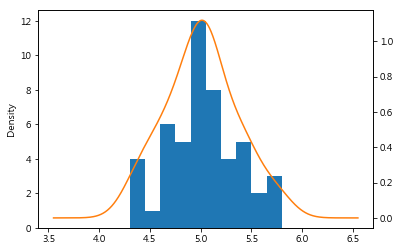

In [7]:
# sepal length(setosa)
ax = setosa_df["sepal length (cm)"].plot(kind='hist')
setosa_df["sepal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

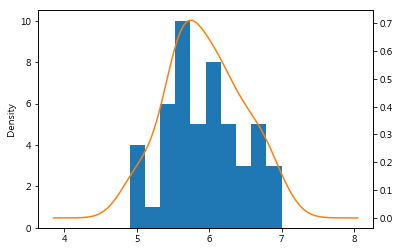

In [8]:
ax = versicolor_df["sepal length (cm)"].plot(kind='hist')
versicolor_df["sepal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

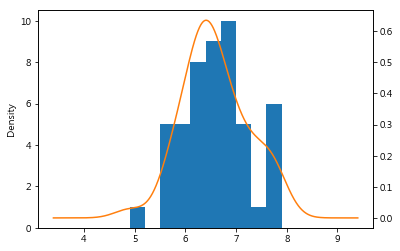

In [9]:
ax = virginica_df["sepal length (cm)"].plot(kind='hist')
virginica_df["sepal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

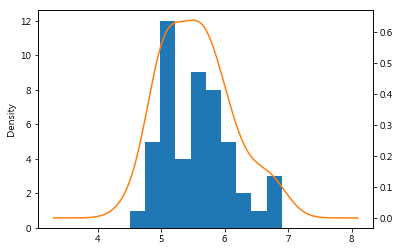

In [10]:
ax = virginica_df["petal length (cm)"].plot(kind='hist')
virginica_df["petal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

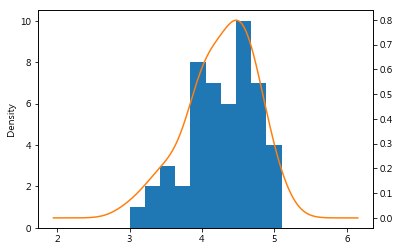

In [11]:
ax = versicolor_df["petal length (cm)"].plot(kind='hist')
versicolor_df["petal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

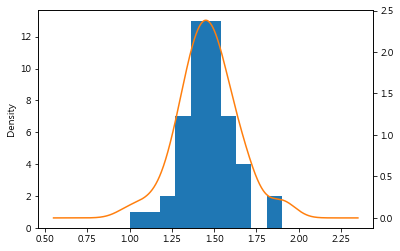

In [12]:
ax = setosa_df["petal length (cm)"].plot(kind='hist')
setosa_df["petal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)

In [15]:
pred = model.predict(X_test)

In [16]:
accuracy_score(y_test, pred)
# 개수가 동일하므로 정밀도와 재현율은 확인할 필요 X

0.9333333333333333

In [17]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [18]:
# 오차표로 어디서 뭘 틀렸는지 확인
metrics.confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 10]], dtype=int64)

In [19]:
# 다항 분포 나이브 베이즈 : 영화 리뷰 감정 분류 
from sklearn.feature_extraction.text import CountVectorizer     # 빈도수 계산위한 패키지
from sklearn.naive_bayes import MultinomialNB

In [20]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [21]:
# 다항분포는 문자를 숫자로 변환해줘야 함 
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [22]:
# 학습을 시키려면 특성과 라벨로 나눠줘야 함 
df_x = df["movie_review"]
df_y = df["label"]

In [23]:
cv = CountVectorizer()   # 카운트벡터라이저 객체 생성 
x_traincv = cv.fit_transform(df_x)
x_traincv
# 배열로 바꿔줘야함
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [24]:
# 벡터화 시킨걸 다시 문자화
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [25]:
# 어떤 단어인지 확인
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [26]:
mnb = MultinomialNB().fit(x_traincv, df_y)    # 학습시키기

In [27]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [28]:
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_df

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [29]:
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [30]:
x_testcv = cv.transform(test_x)

In [31]:
pred = mnb.predict(x_testcv)

In [32]:
accuracy_score(test_y, pred)

1.0

In [33]:
# 베르누이 나이브 베이즈 : 스팸 메일 필터 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [34]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [35]:
df["label"] = df["spam"].map({True:1, False:0})   # true,false는 문자형이아닌 논리형임 
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [36]:
df_x = df["email title"]
df_y = df["label"]

In [37]:
# 베르누이와 다항이 갈리는 부분 
cv = CountVectorizer(binary=True)  # 이진분류이므로
x_traincv = cv.fit_transform(df_x) 
encoded_input = x_traincv.toarray()
encoded_input   # 중복된거에 대한 빈도수를 계산하지 않음 

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [38]:
cv.inverse_transform(encoded_input[0])
# 총 17개의 단어를 벡터화 시킴 

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [39]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [40]:
bnb = BernoulliNB().fit(x_traincv, df_y)

In [41]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df

,email title,spam
0,free flight offer,True
1,hey traveler free flight deal,True
2,limited free game offer,True
3,today flight schedule,False
4,your credit card attached,False
5,free credit card offer only today,False


In [42]:
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_df

,email title,spam,label
0,free flight offer,True,1
1,hey traveler free flight deal,True,1
2,limited free game offer,True,1
3,today flight schedule,False,0
4,your credit card attached,False,0
5,free credit card offer only today,False,0


In [43]:
test_x = test_df["email title"]
test_y = test_df["label"]
x_testcv = cv.transform(test_x)

In [44]:
# 테스트하기
pred = bnb.predict(x_testcv)

In [45]:
accuracy_score(test_y, pred)

0.8333333333333334

In [46]:
# 선형모델보단 분류가 많이 쓰임 
# label없이 특성만 가지고 분류해야함 , 지도방식보다 정확도는 떨어짐

------------------------------------------------
# K-MEANS(비지도)
    - 랜덤
    - 수동
    - kmean++
------------------------------------------------

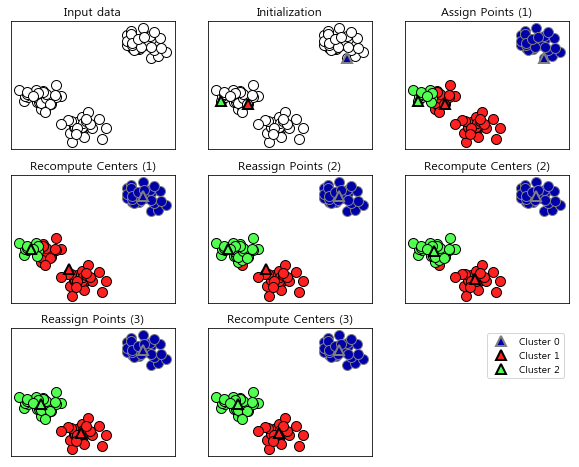

In [47]:
mglearn.plots.plot_kmeans_algorithm()
# 비지도는 데이터가 더 많이 필요함 

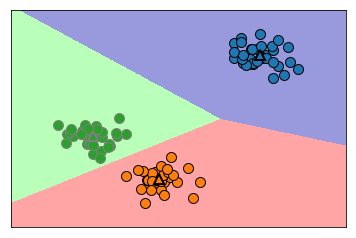

In [48]:
mglearn.plots.plot_kmeans_boundaries()

In [6]:
X, y = datasets.make_blobs(random_state=1)

In [2]:
from sklearn.cluster import KMeans 

In [7]:
km = KMeans(n_clusters=3).fit(X) # 답을 주지않고 학습을 시킴 

In [8]:
print(km.labels_)    # 스스로 찾은 정답을 labels에서 확인 가능 
lbl = km.labels_

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


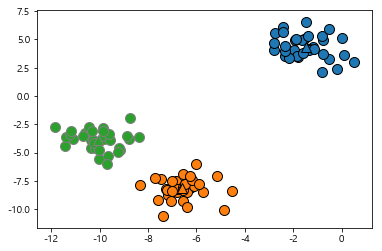

In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2], markers="^")  # 중심점 위치찍기 

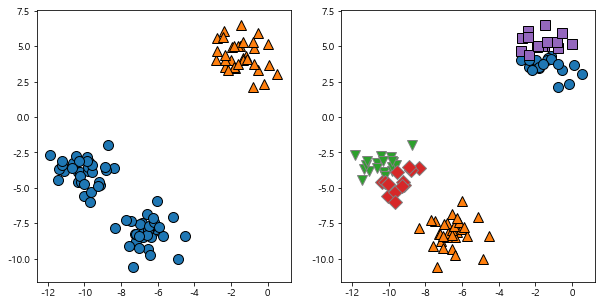

In [10]:
# 중심점이 2개일때와 5개일때 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax=axes[idx])
    idx += 1

In [11]:
# iris샘플을 이용한 예제
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X
y = pd.DataFrame(iris.target)
y.columns=["Target"]
y

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Text(0.5, 1.0, '꽃잎')

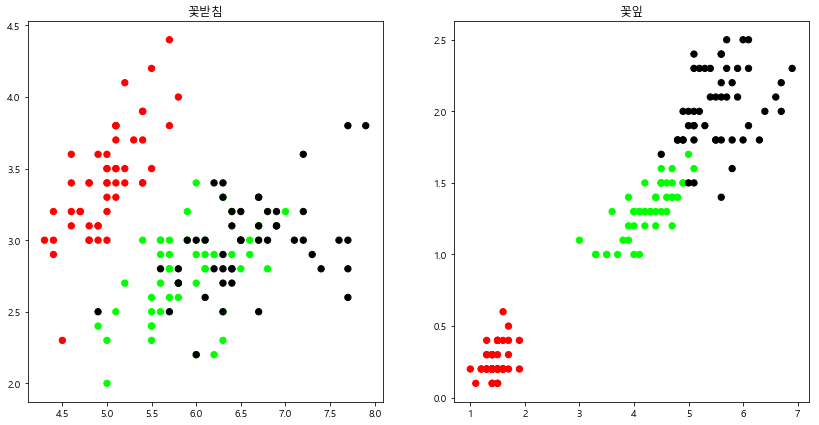

In [12]:
# 꽃잎(Petal)과 꽃받침(Sepal)중에 어떤 것이 더 분류하기 쉬운가?

plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])  # 그래프 그릴때 넘겨줄 데이터

plt.subplot(1, 2, 1)  # 그래프를 2개 그릴 것, 1행 2열의 첫번째 그래프
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.Target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)  # 그래프를 2개 그릴 것, 1행 2열의 2번째 그래프
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Target], s=40)
plt.title("꽃잎")
# 꽃잎이 분류하기 더 용이함 

In [13]:
colormap = np.array(['red', 'lime', 'black'])
colormap[y.Target]

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'lime', 'lime', 'lime', 'lime',
       'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime',
       'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime',
       'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime',
       'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime',
       'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime',
       'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'black', 'black',
       'black', 'black', 'black', 'black', 'black', 'black', 'black',
       'black', 'black', 'black', 'black', 'black', 'black', 'black',
       '

In [14]:
# Kmeans객체 생성 
model = KMeans(n_clusters=3).fit(X)   # 데이터만 주고 학습을 시킴 

In [15]:
print(colormap[y.Target])
print(model.labels_)

['red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'black' 'black' 'black' 'black' 'black' 'black' 'black'
 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black'
 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black'
 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black'
 'black' 'black' 'black' 'black' 'black' 'black' 'black' 'black' 

Text(0.5, 1.0, '결과')

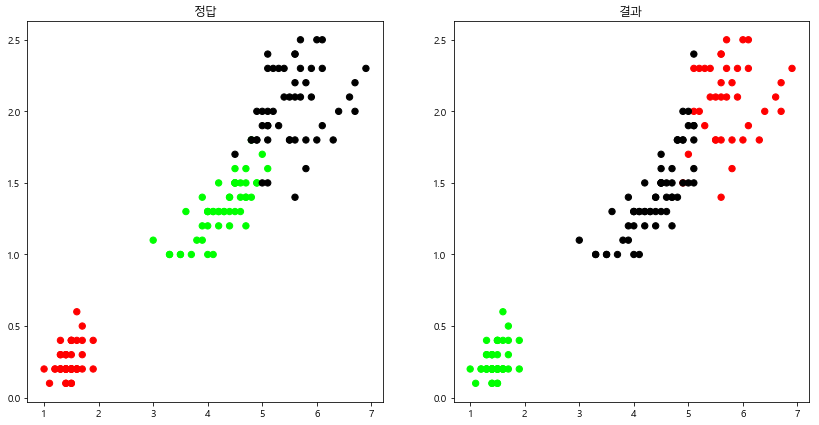

In [16]:
# 정답과 예측한 것을 비교
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])  # 그래프 그릴때 넘겨줄 데이터

plt.subplot(1, 2, 1)  # 그래프를 2개 그릴 것, 1행 2열의 첫번째 그래프
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)  # 그래프를 2개 그릴 것, 1행 2열의 2번째 그래프
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("결과")

In [17]:
colormap

array(['red', 'lime', 'black'], dtype='<U5')

In [22]:
# 수치상 정확도 파악
accuracy_score(y, model.labels_)
print('정확도 :',accuracy_score(y, model.labels_))

print('오차표 : \n',metrics.confusion_matrix(y, model.labels_))

정확도 : 0.09333333333333334
오차표 : 
 [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [109]:
#오차표
metrics.confusion_matrix(y, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [66]:
# 사람들의 키와 몸무게를 이용한 K-means

df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


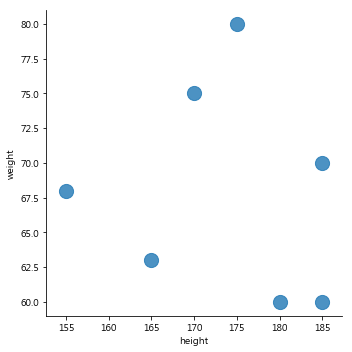

In [67]:
sns.lmplot('height', 'weight', data=df, fit_reg=False, scatter_kws={"s":200})  # 점의 크기

In [68]:
model = KMeans(n_clusters=3).fit(df.values)

In [71]:
model.labels_

array([1, 1, 1, 0, 0, 2, 2])

In [118]:
df["cluster_id"] = model.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


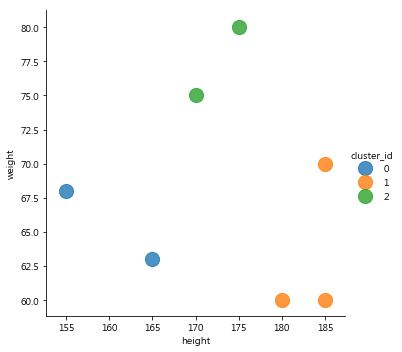

In [119]:
sns.lmplot('height', 'weight', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")

In [120]:
# 인공 신경망 -머신러닝의 범주 MLP(다층)
# sklearn만으로는 부족, tenserflow(라이브러리,특정 언어에 종속X), torch, cafe 
# 딥러닝을 하려면 기본적인 인공신경망 구조를 알아야함 (Sung kim)